In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 15.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time= 1.9min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time= 2.2min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time= 2.0min
[CV] END max_depth=400, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time= 2.7min
[CV] END max_depth=400, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time= 2.9min
[CV] END max_depth=400, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time= 2.7min
[CV] END max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  26.5s
[CV] END max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  30.7s
[CV] END max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  29.2s
[CV] END max_depth=400,

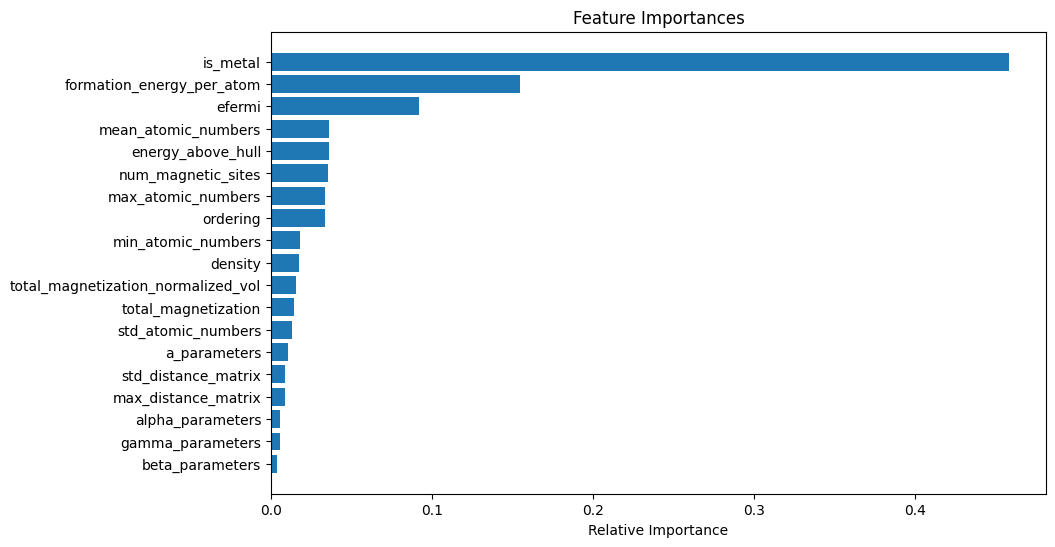

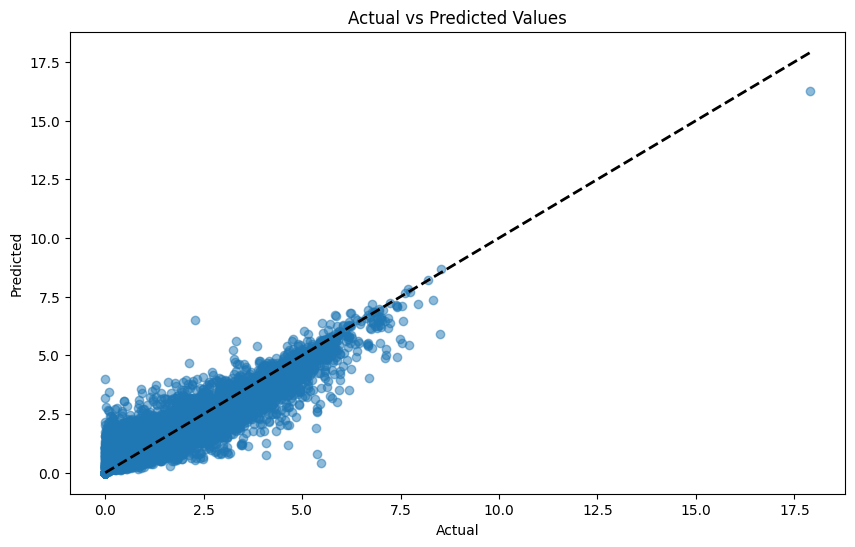

In [ ]:
# %%
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV

df = pd.read_csv("./materials.csv")

selected_features = [
    "band_gap",
    "is_metal",
    "formation_energy_per_atom",
    "efermi",
    "ordering",
    "max_atomic_numbers",
    "min_atomic_numbers",
    "density",
    "total_magnetization",
    "max_distance_matrix",
    "alpha_parameters",
    'num_magnetic_sites',
    'energy_above_hull',
    'mean_atomic_numbers',
    "total_magnetization_normalized_vol",
    "std_atomic_numbers",
    "a_parameters",
    "std_distance_matrix",
    "gamma_parameters",
    "beta_parameters"
]

df = df[selected_features]

# %%
df.dropna(inplace=True)

# %%
label_encoder = LabelEncoder()

df["ordering"] = label_encoder.fit_transform(df["ordering"])
df["is_metal"] = label_encoder.fit_transform(df["is_metal"])

# %%
X = df.drop(columns=["band_gap"])
y = df["band_gap"]

# %%
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# %%
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# %%
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 50, 100, 200, 400],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

search_space = {
    'n_estimators': (100, 500),
    'max_depth': (10, 400),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4)
}

rf = RandomForestRegressor(random_state=42)


# search = GridSearchCV(estimator=rf, param_grid=param_dist, cv=3, n_jobs=-1, verbose=2)
search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)
# search = BayesSearchCV(estimator=rf, search_spaces=search_space, n_iter=96, cv=3, n_jobs=-1, verbose=2, random_state=42)

search.fit(X_train, y_train)

best_params = search.best_params_
print(f"Best parameters: {best_params}")

best_model = search.best_estimator_
best_model.fit(X_train, y_train)

# %%
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

# %%
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.show()




<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f461dc62-5740-4c7e-8df6-7838440178d5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>